### **120 Years of Olympic History - EDA**

### The **Olympic dataset** was downloaded from Kaggle - https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data

### This dataset contains records spanning Olympic Games from 1896 to 2016. Each row represents a unique athlete's participation in a specific Olympic event. The dataset is publicly available under a CC (Creative Commons) license.

### The features/attributes in the dataset include:
1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA







## **Importing necessary Libraries and Reading the Dataset**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv("athlete_events.csv")
df.head()


Mounted at /content/drive


ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [ ]:
df_noc = pd.read_csv("noc_regions.csv")
df_noc.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

## **General Information about the Dataset** e.g. attributes, data types, number of records, missing values, etc.

**Comments and Observations**
- The primary dataset consisted of 271,116 records detailing individual Olympic athletes, each described by 15 attributes including demographic information, event participation, and medal outcomes. The mumber of distinct athletes (no duplicates) was 188778.
- The secondary dataset contained 230 records, representing countries or collective nations that have participated in the Olympic Games over the past 120 years, with 3 attributes related to National Olympic Committees (NOCs) and their corresponding regions.
- It is worth noting that the primary dataset included missing values in several key fields—most notably Age, Weight, Height, and Medal, thus requiring pre-processing.

In [ ]:
#rows and columns
df.shape

(271116, 15)

In [ ]:
#rows and columns
df_noc.shape

(230, 3)

In [ ]:
#basic info about columns and datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


In [ ]:
#noc info about columns and datatypes
print(df_noc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB
None


In [ ]:
#look at the first few rows
print(df.head())


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [ ]:
#check for missing values
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## **Distinct Countries**

In [ ]:
# number of countries present in the dataset
df['NOC'].nunique()

230

## **Distinct Athletes**

In [ ]:
#Get relevant columns
athlete_cols = ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC']

#Drop duplicates to get distinct athlete records
distinct_athletes = df[athlete_cols].drop_duplicates()

#Count total non-null medals per athlete
medal_counts = df.dropna(subset=['Medal']).groupby('ID').size().reset_index(name='Total_Medals')

#Merge distinct athletes with their medal counts
athlete_medals = pd.merge(distinct_athletes, medal_counts, on='ID', how='left')

#Replace NaN medal counts with 0 (athletes who never won a medal)
athlete_medals['Total_Medals'] = athlete_medals['Total_Medals'].fillna(0).astype(int)

distinct_athletes = athlete_medals

#View the result
print(distinct_athletes.head())
print('\nNumber of Athletes (no duplicates)', len(distinct_athletes))


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC  Total_Medals  
0  CHN             0  
1  CHN             0  
2  DEN             0  
3  DEN             1  
4  NED             0  

Number of Athletes (no duplicates) 188778


## **Outliers in the Dataset**
**Comments and Observations**
- A boxplot was chosen to visualize outliers in the numerical dataset because it effectively highlights the distribution, central tendency (median), and spread of the data, while clearly identifying extreme values that fall outside the typical range.
- This made it an ideal tool for detecting anomalies in key attributes such as Age, Height, Weight, and Year.
- We did not observe an unusual values in the dataset. However, observations made about the large spread, was not a cause for concern.
- We decided to keep these values and investigate further.

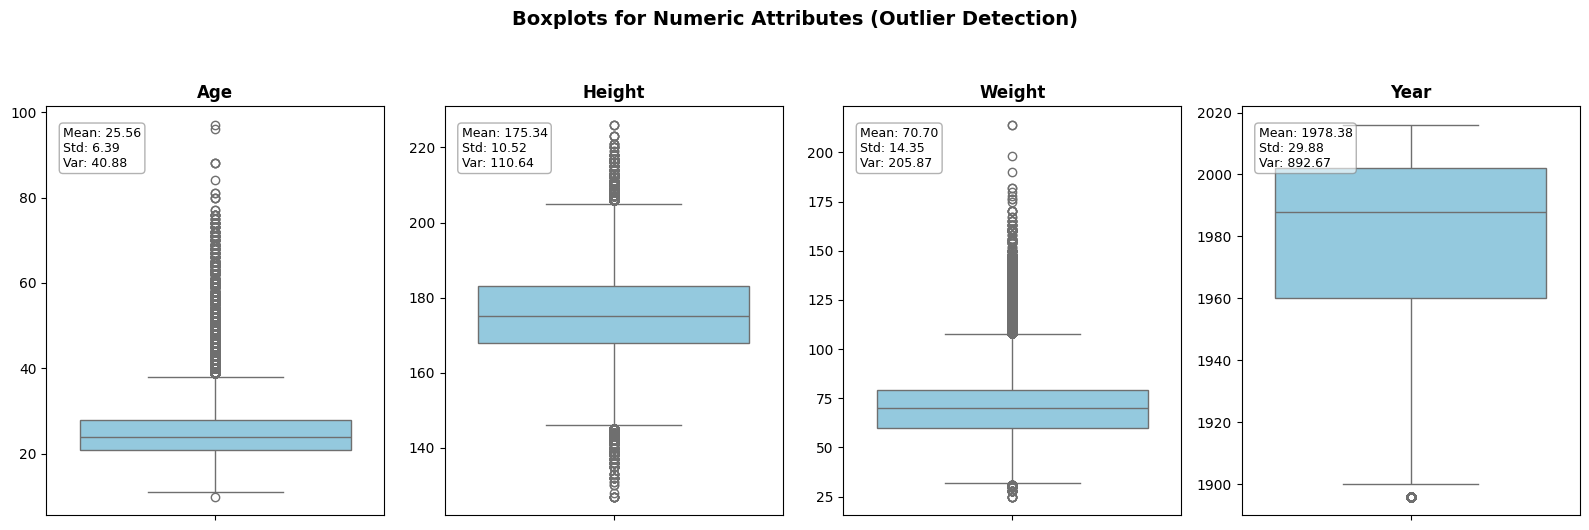

In [ ]:
# Select only numeric columns
num_cols = ['Age', 'Height', 'Weight', 'Year']  # You can exclude 'ID' if it's just a unique identifier

# Set up subplots dynamically
fig, axs = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(16, 5))

# Plot each numeric column as a boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axs[i], color='skyblue')

    # Compute stats
    series = df[col].dropna() #drop null values
    mean = series.mean()
    std = series.std()
    var = series.var()

    # Set title
    axs[i].set_title(f'{col}', fontweight='bold')

    # Annotate with stats
    text = f"Mean: {mean:.2f}\nStd: {std:.2f}\nVar: {var:.2f}"
    axs[i].text(
        0.05,              # x-position in axis coordinates
        0.95,              # y-position in axis coordinates
        text,
        transform=axs[i].transAxes,
        fontsize=9,
        verticalalignment='top',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='gray', alpha=0.6)
    )

    axs[i].set_xlabel("")
    axs[i].set_ylabel("")


plt.suptitle("Boxplots for Numeric Attributes (Outlier Detection)", fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

## **Visualizing Missing vs. Non-missing Values**
- Our team wanted to understand how dense/spare our dataset. This was achieved by using various visualizations e.g. heatmap and barplots to understand the missing versus non-missing attributes in the primary dataset. A color scheme was used where 'green' represented non-missing values (Good) and 'muted coral', which is a shade of red represented missing values (Bad), allowing for a clear visual distinction. Text or annotaions appeared in either black or white to show good contrast with the background color.
- We found out that there were only 4 attributes – Age, Height, Weight and Medal that had missing values.
- The large missing values for Medals made sense because not every athlete wins a medal at the Olympics.
- We made a decision to drop the records with missing age, height and weight, but transform the medal column by imputing the missing cells with 0.

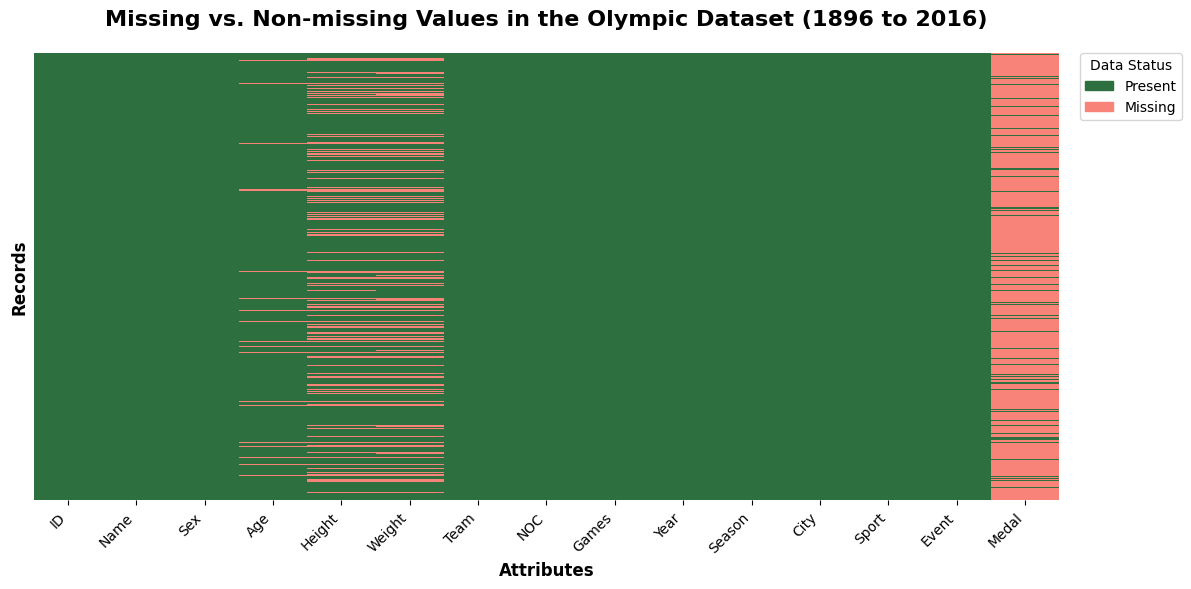

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))  # width=12 inches, height=6 inches

colors = ["#2E6F40", "#F88379"]  # muted coral, green
# Create heatmap
ax = sns.heatmap(df.isna(), cbar=False, cmap=colors, yticklabels=False)


# Optional: rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add title and axis labels
ax.set_title("Missing vs. Non-missing Values in the Olympic Dataset (1896 to 2016)", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Attributes", fontsize=12, fontweight='bold')
ax.set_ylabel("Records", fontsize=12, fontweight='bold')

# Add custom legend (color key)
present_patch = mpatches.Patch(color='#2E6F40', label='Present')
missing_patch = mpatches.Patch(color='#F88379', label='Missing')

# Add legend to upper right corner (adjust location as needed)
plt.legend(handles=[present_patch, missing_patch],
           title='Data Status',
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., frameon=True)

# Show plot
plt.tight_layout()
plt.show()

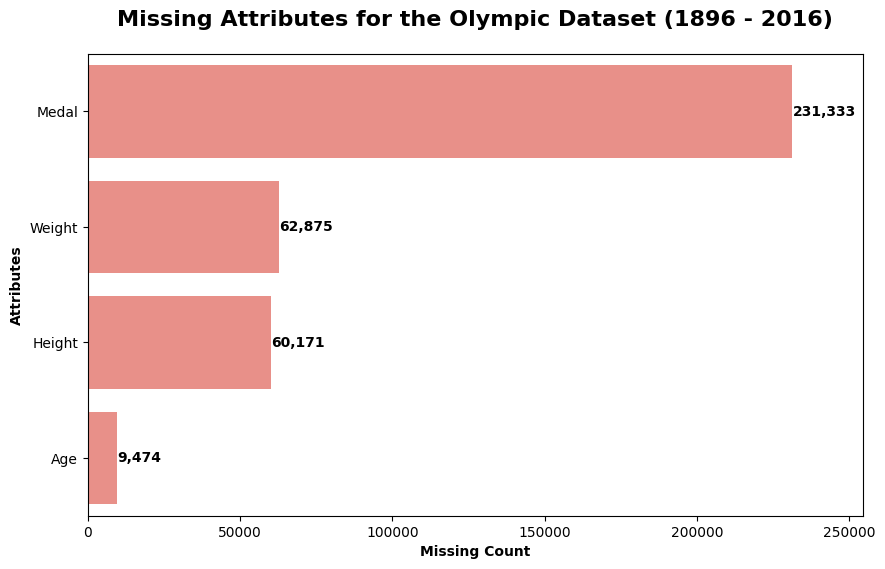

In [ ]:
# Total missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Prepare DataFrame for plotting (Seaborn prefers working with DataFrames)
missing_df = missing.reset_index()
missing_df.columns = ['Attribute', 'MissingCount']

# Bar plot
plt.figure(figsize=(10, 6))


sns.barplot(
    data=missing_df,
    x='MissingCount',
    y='Attribute',
    color='#F88379',  # or any valid color name / hex code
    dodge=False,
    legend=False      # Suppress legend as it's redundant
)

# Set x-axis limit a bit beyond max value
plt.xlim(0, missing_df['MissingCount'].max() * 1.1)

# Add value labels
for i, value in enumerate(missing_df['MissingCount']):
    plt.text(value + 100, i, f'{value:,}', va='center', fontweight='bold')

plt.title("Missing Attributes for the Olympic Dataset (1896 - 2016)", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Missing Count", fontweight='bold')
plt.ylabel("Attributes", fontweight='bold')
plt.show()

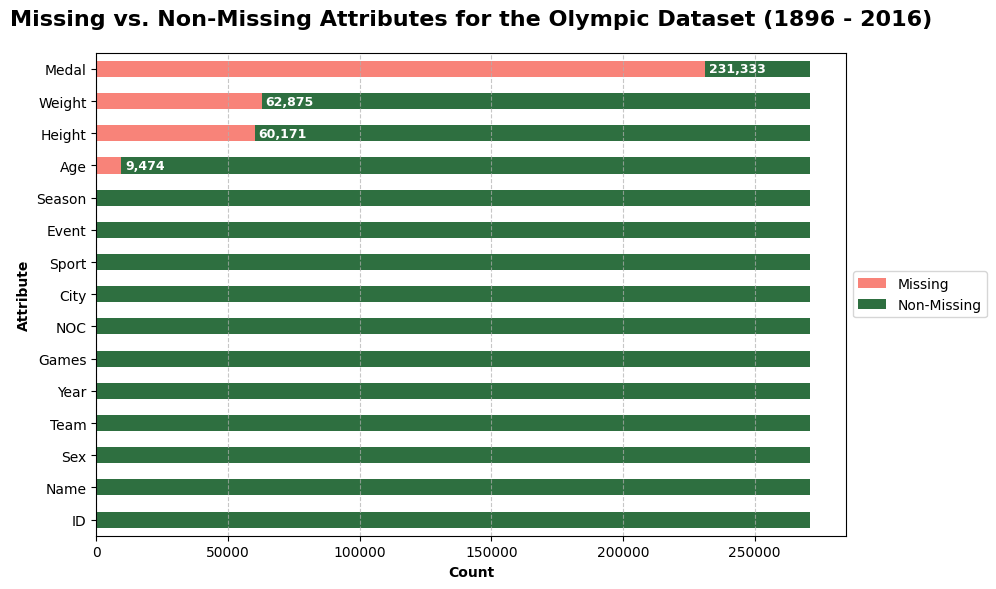

In [ ]:
# Count total and missing values
total = len(df)
missing_counts = df.isnull().sum()
non_missing_counts = total - missing_counts

# Combine into a DataFrame
missing_df = pd.DataFrame({
    'Missing': missing_counts,
    'Non-Missing': non_missing_counts
}, index=df.columns)

# Softer colors
colors = ["#F88379", "#2E6F40"]  # muted coral, green

# Sort by 'Missing' before plotting
missing_df = missing_df.sort_values(by='Non-Missing', ascending=False)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
missing_df.plot(kind='barh', stacked=True, color=colors, ax=ax, edgecolor='none')

# Add labels for Missing values just outside the bar
for i, (index, row) in enumerate(missing_df.iterrows()):
    missing_val = row['Missing']
    if missing_val > 0:
        ax.text(missing_val + total * 0.005, i, f"{int(missing_val):,}",
                va='center', ha='left', color='white', fontsize=9, fontweight = 'bold')
# Title and labels
ax.set_title("Missing vs. Non-Missing Attributes for the Olympic Dataset (1896 - 2016)", fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel("Count", fontweight='bold')
ax.set_ylabel("Attribute", fontweight='bold')

# Add subtle grid
ax.grid(axis='x', linestyle='--', linewidth=0.8, alpha=0.7)

# Move legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=True)

# Adjust layout to fit everything
plt.tight_layout()
plt.show()


## **Preprocessing**

### **Create a Medal_Encoded column (One-hot encoding) - 'Gold': 3, 'Silver': 2, 'Bronze': 1, 'NA': 0**

In [ ]:
medal_map = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'NA': 0}
df['Medal_Encoded'] = df['Medal'].map(medal_map).fillna(0).astype(int)

### **Dropping missing Age, Weight and Height rows**
**Comments and Observations**

- Weighing the pros and cons of dropping our missing values, we found that even after dropping variables like age, weight and height, we were left with a sizeable number of records to work with for our project.

In [ ]:
original_count = len(df)
df_clean = df.dropna(subset=['Age', 'Height', 'Weight'])
print(f"Total records (missing and non-missing data): {original_count}")
print('Records with non-missing values (age, height and weight):', len(df_clean))

dropped = original_count - len(df_clean)
print(f"Rows dropped: {dropped}")

Total records (missing and non-missing data): 271116
Records with non-missing values (age, height and weight): 206165
Rows dropped: 64951


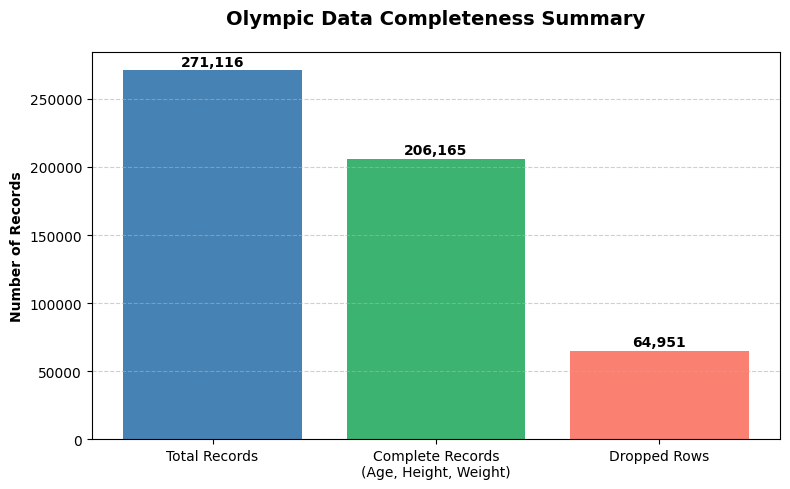

In [ ]:
# Data for plotting
counts = [original_count, len(df_clean), dropped]
labels = ['Total Records', 'Complete Records\n(Age, Height, Weight)', 'Dropped Rows']

# Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, counts, color=['steelblue', 'mediumseagreen', 'salmon'])

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{yval:,}', ha='center', va='bottom', fontweight='bold')

# Title and axis labels
plt.title('Olympic Data Completeness Summary', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Number of Records', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
#check for missing values
df_clean.isna().sum()

ID                    0
Name                  0
Sex                   0
Age                   0
Height                0
Weight                0
Team                  0
NOC                   0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal            175984
Medal_Encoded         0
dtype: int64

## **Count of Sample Countries for Discrepancies** e.g. URS vs. RUS

### Years with data for URS vs. RUS

In [ ]:
# Years with URS (Soviet Union) data
urs_years = df[df['NOC'] == 'URS']['Year'].unique()
urs_years.sort()
print("URS years:", urs_years)

# Years with RUS (Russia) data
rus_years = df[df['NOC'] == 'RUS']['Year'].unique()
rus_years.sort()
print("RUS years:", rus_years)


URS years: [1952 1956 1960 1964 1968 1972 1976 1980 1984 1988]
RUS years: [1900 1908 1912 1924 1994 1996 1998 2000 2002 2004 2006 2008 2010 2012
 2014 2016]


### Years with data for USA

In [ ]:
# Years with US data
usa_years = df[df['NOC'] == 'USA']['Year'].unique()
usa_years.sort()
print("US years:", usa_years)


US years: [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016]


## **Statistics and other Demographics of the Athletes**

In [ ]:
# Number of distinct athletes
num_athletes = distinct_athletes.shape[0]

# Count males and females
gender_counts = distinct_athletes['Sex'].value_counts()
num_males = gender_counts.get('M', 0)
num_females = gender_counts.get('F', 0)

# Drop missing ages
ages = distinct_athletes['Age'].dropna()

# Calculate age statistics
max_age = ages.max()
min_age = ages.min()
avg_age = ages.mean()
median_age = ages.median()
mode_age = ages.mode().iloc[0] if not ages.mode().empty else None  # In case there's no mode

# Print results
print(f"Number of distinct athletes: {num_athletes}")
print(f"Number of male athletes: {num_males}")
print(f"Number of female athletes: {num_females}")

print("\nWhole Group (Males+Females)")
print("..............................")
print(f"\nMaximum age: {max_age}")
print(f"Minimum age: {min_age}")
print(f"Average age: {avg_age:.2f}")
print(f"Median age: {median_age}")
print(f"Modal age: {mode_age}")


# Drop missing weights
weights = distinct_athletes['Weight'].dropna()

# Calculate weight statistics
max_wgt = weights.max()
min_wgt = weights.min()
avg_wgt = weights.mean()
median_wgt = weights.median()
mode_wgt = weights.mode().iloc[0] if not weights.mode().empty else None  # In case there's no mode

# Print results
print(f"\nMaximum weight: {max_wgt}")
print(f"Minimum weight: {min_wgt}")
print(f"Average weight: {avg_wgt:.2f}")
print(f"Median weight: {median_wgt}")
print(f"Modal weight: {mode_wgt}")

# Drop missing heights
heights = distinct_athletes['Height'].dropna()

# Calculate height statistics
max_hgt = heights.max()
min_hgt = heights.min()
avg_hgt = heights.mean()
median_hgt = heights.median()
mode_hgt = heights.mode().iloc[0] if not weights.mode().empty else None  # In case there's no mode

# Print results
print(f"\nMaximum height: {max_hgt}")
print(f"Minimum height: {min_hgt}")
print(f"Average height: {avg_hgt:.2f}")
print(f"Median height: {median_hgt}")
print(f"Modal height: {mode_hgt}")


# Filter male athletes
male_athletes = distinct_athletes[distinct_athletes['Sex'] == 'M']

# --- Age Stats for Males ---
male_ages = male_athletes['Age'].dropna()
max_age_m = male_ages.max()
min_age_m = male_ages.min()
avg_age_m = male_ages.mean()
median_age_m = male_ages.median()
mode_age_m = male_ages.mode().iloc[0] if not male_ages.mode().empty else None

# --- Weight Stats for Males ---
male_weights = male_athletes['Weight'].dropna()
max_wgt_m = male_weights.max()
min_wgt_m = male_weights.min()
avg_wgt_m = male_weights.mean()
median_wgt_m = male_weights.median()
mode_wgt_m = male_weights.mode().iloc[0] if not male_weights.mode().empty else None

# --- Height Stats for Males ---
male_heights = male_athletes['Height'].dropna()
max_hgt_m = male_heights.max()
min_hgt_m = male_heights.min()
avg_hgt_m = male_heights.mean()
median_hgt_m = male_heights.median()
mode_hgt_m = male_heights.mode().iloc[0] if not male_heights.mode().empty else None

print("\nMales Only")
print("..............................")
print(f"Maximum age: {max_age_m}")
print(f"Minimum age: {min_age_m}")
print(f"Average age: {avg_age_m:.2f}")
print(f"Median age: {median_age_m}")
print(f"Modal age: {mode_age_m}")

print(f"\nMaximum weight: {max_wgt_m}")
print(f"Minimum weight: {min_wgt_m}")
print(f"Average weight: {avg_wgt_m:.2f}")
print(f"Median weight: {median_wgt_m}")
print(f"Modal weight: {mode_wgt_m}")

print(f"\nMaximum height: {max_hgt_m}")
print(f"Minimum height: {min_hgt_m}")
print(f"Average height: {avg_hgt_m:.2f}")
print(f"Median height: {median_hgt_m}")
print(f"Modal height: {mode_hgt_m}")

# Filter female athletes
female_athletes = distinct_athletes[distinct_athletes['Sex'] == 'F']

# --- Age Stats for Females ---
female_ages = female_athletes['Age'].dropna()
max_age_f = female_ages.max()
min_age_f = female_ages.min()
avg_age_f = female_ages.mean()
median_age_f = female_ages.median()
mode_age_f = female_ages.mode().iloc[0] if not female_ages.mode().empty else None

# --- Weight Stats for Females ---
female_weights = female_athletes['Weight'].dropna()
max_wgt_f = female_weights.max()
min_wgt_f = female_weights.min()
avg_wgt_f = female_weights.mean()
median_wgt_f = female_weights.median()
mode_wgt_f = female_weights.mode().iloc[0] if not female_weights.mode().empty else None

# --- Height Stats for Females ---
female_heights = female_athletes['Height'].dropna()
max_hgt_f = female_heights.max()
min_hgt_f = female_heights.min()
avg_hgt_f = female_heights.mean()
median_hgt_f = female_heights.median()
mode_hgt_f = female_heights.mode().iloc[0] if not female_heights.mode().empty else None

print("\nFemales Only")
print("..............................")
print(f"Maximum age: {max_age_f}")
print(f"Minimum age: {min_age_f}")
print(f"Average age: {avg_age_f:.2f}")
print(f"Median age: {median_age_f}")
print(f"Modal age: {mode_age_f}")

print(f"\nMaximum weight: {max_wgt_f}")
print(f"Minimum weight: {min_wgt_f}")
print(f"Average weight: {avg_wgt_f:.2f}")
print(f"Median weight: {median_wgt_f}")
print(f"Modal weight: {mode_wgt_f}")

print(f"\nMaximum height: {max_hgt_f}")
print(f"Minimum height: {min_hgt_f}")
print(f"Average height: {avg_hgt_f:.2f}")
print(f"Median height: {median_hgt_f}")
print(f"Modal height: {mode_hgt_f}")


Number of distinct athletes: 188778
Number of male athletes: 139614
Number of female athletes: 49164

Whole Group (Males+Females)
..............................

Maximum age: 97.0
Minimum age: 10.0
Average age: 25.80
Median age: 25.0
Modal age: 23.0

Maximum weight: 214.0
Minimum weight: 25.0
Average weight: 72.51
Median weight: 71.0
Modal weight: 70.0

Maximum height: 226.0
Minimum height: 127.0
Average height: 176.56
Median height: 176.0
Modal height: 180.0

Males Only
..............................
Maximum age: 97.0
Minimum age: 10.0
Average age: 26.30
Median age: 25.0
Modal age: 23.0

Maximum weight: 214.0
Minimum weight: 28.0
Average weight: 77.18
Median weight: 75.0
Modal weight: 70.0

Maximum height: 226.0
Minimum height: 127.0
Average height: 179.73
Median height: 180.0
Modal height: 180.0

Females Only
..............................
Maximum age: 74.0
Minimum age: 11.0
Average age: 24.43
Median age: 24.0
Modal age: 23.0

Maximum weight: 167.0
Minimum weight: 25.0
Average weight

**Comments and Observations**
- Age - On average, male athletes are older (26.3 years) than female athletes (24.4 years). The overall average age across all athletes is approximately 25.8 years.
- Weight - Male athletes weigh more on average (77.2 kg) compared to female athletes (61.6 kg). The combined average weight for all athletes is around 72.5 kg.
- Height - Male athletes are taller, with an average height of 179.7 cm, while female athletes average 169.2 cm. The general average height is 176.6 cm.

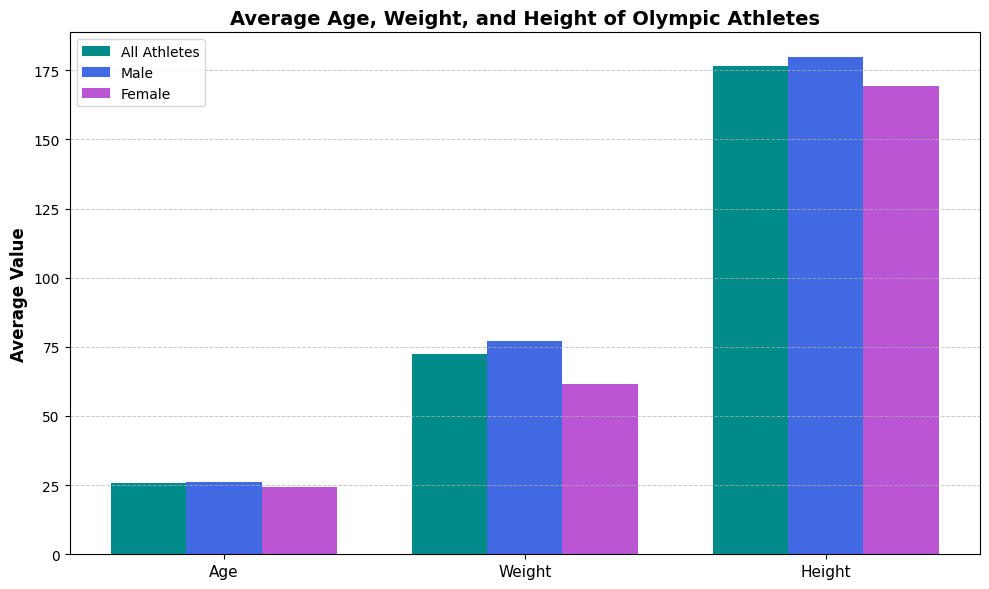

In [ ]:
# Data
categories = ['Age', 'Weight', 'Height']
avg_values = [25.80, 72.51, 176.56]
avg_male = [26.30, 77.18, 179.73]
avg_female = [24.43, 61.64, 169.18]

# Combine for grouped bar chart
x = np.arange(len(categories))  # positions
width = 0.25
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, avg_values, width, label='All Athletes', color='darkcyan')
ax.bar(x, avg_male, width, label='Male', color='royalblue')
ax.bar(x + width, avg_female, width, label='Female', color='mediumorchid')

# Formatting
ax.set_ylabel('Average Value', fontsize=12, fontweight='bold')
ax.set_title('Average Age, Weight, and Height of Olympic Athletes', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=11)
ax.legend()

# Add horizontal gridlines
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()

## **Distribution of Male to Female Athletes**

**Comments and Observations**
- The a chart below showcases the difference in male and female participation.One can observe that the number of female athletes is less than half that of their males counterparts.
- The colors, 'royal blue' and 'medium orchid' were chosen because of theit popular association with the males and females sexes

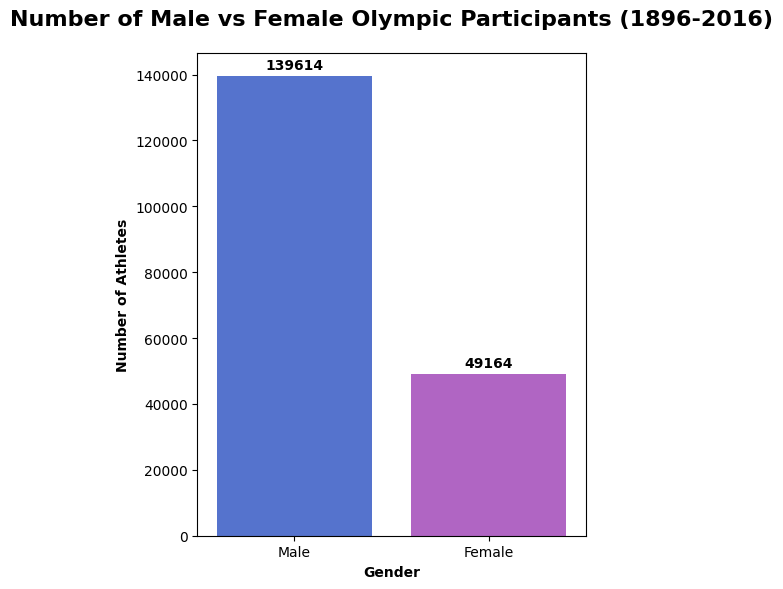

In [ ]:
# Define custom colors for male and female
gender_palette = {'M': 'royalblue', 'F': 'mediumorchid'}

# Create the plot
plt.figure(figsize=(5, 6))
ax = sns.countplot(
    data=distinct_athletes,
    x='Sex',
    hue='Sex',              # Assign hue to match palette
    palette=gender_palette,
    dodge=False,            # So you get one bar per category
    legend=False
)

# Replace tick labels from 'M' and 'F' to 'Male' and 'Female'
ax.set_xticks([0, 1])  # Fix the tick positions
ax.set_xticklabels(['Male', 'Female'])
# Add title
plt.title('Number of Male vs Female Olympic Participants (1896-2016)', fontsize = 16, pad = 20, fontweight='bold')

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10, fontweight='bold')

plt.xlabel("Gender", fontweight='bold')
plt.ylabel("Number of Athletes", fontweight='bold')

plt.tight_layout()
plt.show()

## **Participation of Males and Females in the Olympic Games over the Years**

**Comments and Observations**
- Over the past 120 years, male participation has consistently outnumbered female participation at the Olympic Games.
- Nonetheless, both male and female athlete numbers have steadily increased, particularly from the 19th to the 20th century, reflecting inclusivity in sports.
- Fluctuations in participation were observed across decades, and further investigation using secondary data revealed that major global events—such as World Wars and Olympic boycotts—were key contributors to these declines.
- To enhance usability, an interactive hover feature was implemented, allowing users to explore specific participation data for each bar more intuitively, rather than relying solely on fixed axis labels.
- The colors, 'royal blue' and 'medium orchid' were maintained for consistency

In [ ]:
# Filter relevant columns and drop missing
df_filtered = df[['Year', 'Sex']].dropna()

# Define bin edges manually and ensure last bin includes 2016
year_min = df_filtered['Year'].min()
year_max = 2016  # explicitly cap at 2016
nbins = 18
bin_edges = np.linspace(year_min, year_max + 1, nbins + 1)  # +1 ensures 2016 is included

# Create bin labels like "1896–1907"
bin_labels = [f"{int(bin_edges[i])}–{int(bin_edges[i+1]) - 1}" for i in range(nbins)]

# Bin the data and assign labels
df_filtered['YearBin'] = pd.cut(
    df_filtered['Year'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True,
    right=False
)

# Create histogram using the binned years
fig = px.histogram(
    df_filtered,
    x='YearBin',
    color='Sex',
    barmode='stack',
    color_discrete_map={'M': 'royalblue', 'F': 'mediumorchid'},
    category_orders={
        'Sex': ['F', 'M'],
        'YearBin': bin_labels  # Order bars by actual year range
    },
    title='Athlete Participation Over Years (1896–2016) by Gender',
    labels={'count': 'Number of Athletes', 'YearBin': 'Olympic Year Range'}
)

# Layout polish
fig.update_layout(
    height=800,
    width=900,
    plot_bgcolor='white',

    title={
        'text': '<b>Athlete Participation Over Years (1896–2016) by Gender</b><br>(Interactive Hover - Male and Female Bar Portions)',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'family': 'Arial',
            'color': 'black',
        }
    },

    xaxis=dict(
        title='<b>Olympic Year Range</b>',
        showgrid=False,
        tickangle=45
    ),
    yaxis=dict(title='<b>Number of Athletes</b>', gridcolor='lightgray'),
    legend_title_text='Gender',
    bargap=0.05,

    hoverlabel=dict(
        bgcolor="black",
        font_color="white"
    )
)

# Add shaded rectangle to highlight WWII gap bin (1936–1942)
fig.add_shape(
    type="rect",
    xref="x",
    yref="paper",
    x0="1936–1942",
    x1="1936–1942",
    y0=0,
    y1=1,
    fillcolor="lightgray",
    opacity=0.4,
    layer="below",
    line_width=0,
)

# Add custom key (legend-style) in the top right
fig.add_annotation(
    xref="paper",
    yref="paper",
   # x="1936–1942",
    x=0.28,
    y=0.785,  # Near top of the chart, above the shaded bar
    showarrow=False,
    align="left",
    text="<b>Note:</b><br>War Conflicts <br>(No Olympics in 1916, 1940, 1944)<br>1956,1980,1984 boycotts",
    font=dict(size=12, color="white"),
    bgcolor="#333333",
    bordercolor="white",
    borderwidth=1,
)

fig.show()


## **Age Distribution of Olympic Athletes**
**Comments and Observations**
- The peak age of Olympic participation is 23, representing the most common age at which athletes compete at the Games.
- The majority of athletes fall within the 19 to 29 age range, aligning with the period of peak physical performance and competitive readiness
- Interestingly, some athletes continue to participate well beyond age 50, particularly in disciplines that emphasize skill, precision, or endurance over raw physicality, demonstrating the diverse demands across Olympic sports

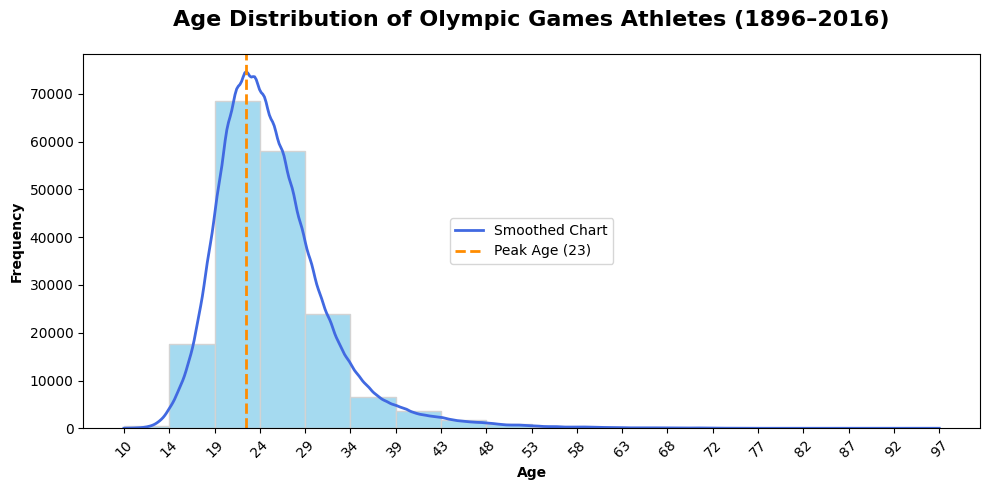

In [ ]:
from scipy.stats import gaussian_kde

# Drop NA and define data
age_data = distinct_athletes['Age'].dropna()

# Define number of bins (Sturges' rule)
num_bins = int(np.log2(len(age_data)) + 1)
bin_edges = np.histogram_bin_edges(age_data, bins=num_bins)

# Manually compute KDE
kde = gaussian_kde(age_data)
x_range = np.linspace(age_data.min(), age_data.max(), 500)
kde_values = kde(x_range)

# Scale KDE to match frequency
bin_width = bin_edges[1] - bin_edges[0]
scaled_kde = kde_values * len(age_data) * bin_width

# Find KDE peak
peak_idx = np.argmax(scaled_kde)
peak_age = x_range[peak_idx]

# Threshold (you can change this value)
threshold_age = 30

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(age_data, bins=bin_edges, color='skyblue', edgecolor='lightgray', kde=False)

# KDE line
plt.plot(x_range, scaled_kde, color='royalblue', label='Smoothed Chart', linewidth=2)

# Vertical line for KDE peak
plt.axvline(x=peak_age, color='darkorange', linestyle='--', linewidth=2, label=f'Peak Age ({peak_age:.0f})')

# Labels & ticks
plt.title('Age Distribution of Olympic Games Athletes (1896–2016)', fontsize = 16, pad = 20, fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')

tick_labels = [f'{int(edge)}' for edge in bin_edges]
plt.xticks(bin_edges, tick_labels, rotation=45)

# Legend
plt.legend(loc = 'center')

plt.tight_layout()
plt.show()


## **Age to Medal Type**
**Comments and Observations**
- In examining the ages of athletes who won different types of Olympic medals, we observed that the average age and standard deviation were remarkably consistent across Gold, Silver, and Bronze categories.
- On average, 26-year-olds were most likely to win medals, suggesting a common age window where peak performance aligns with medal-winning outcomes, regardless of medal type.

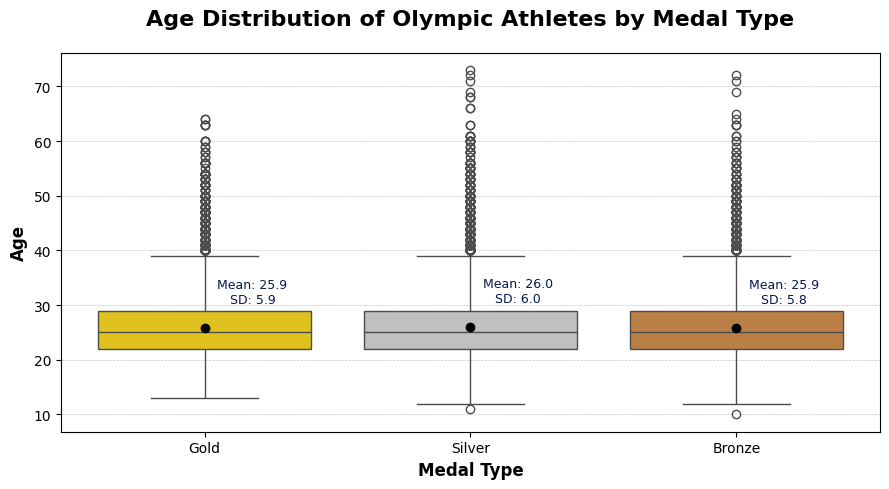

In [ ]:
# Define medal colors (in Olympic order)
medal_colors = {
    'Gold': '#FFD700',
    'Silver': '#C0C0C0',
    'Bronze': '#CD7F32'
}

# Filter data with medals
medal_df = df[df['Medal'].notna()]

# Create plot
plt.figure(figsize=(9, 5))
ax = sns.boxplot(
    data=medal_df,
    x='Medal',
    y='Age',
    hue='Medal',
    palette=medal_colors,
    order=['Gold', 'Silver', 'Bronze'],
    legend=False
)

# Titles and axis labels
plt.title('Age Distribution of Olympic Athletes by Medal Type', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Medal Type', fontsize=12, fontweight='bold')
plt.ylabel('Age', fontsize=12, fontweight='bold')

# Gridlines for readability
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Compute mean, std, var
stats = medal_df.groupby('Medal')['Age'].agg(['mean', 'std', 'var'])

# Annotate mean, SD; add dark gray dot at mean
for i, medal in enumerate(['Gold', 'Silver', 'Bronze']):
    if medal in stats.index:
        mean_val = stats.loc[medal, 'mean']
        std_val = stats.loc[medal, 'std']

        # Plot dot at mean
        ax.plot(i, mean_val, 'o', color='black', zorder=5)

        # Annotate stats above the dot
        annotation = f"Mean: {mean_val:.1f}\nSD: {std_val:.1f}"
        ax.text(i+0.18, mean_val + 4, annotation,
                ha='center', va='bottom', fontsize=9, color='#051650')

# Clean up legend if present
if ax.get_legend():
    ax.get_legend().remove()

# Final layout
plt.tight_layout()
plt.show()


In [ ]:
# Filter valid rows (non-null Age and Medal)
medal_df = df[df['Medal'].notna() & df['Age'].notna()]

# Group by Medal and calculate stats
summary_stats = medal_df.groupby('Medal')['Age'].agg(
    Minimum='min',
    Maximum='max',
    Average='mean',
    Median='median'
).round(1)  # Round for neat display

# Print the result
print("Age Summary by Medal Type:")
print(summary_stats)

Age Summary by Medal Type:
        Minimum  Maximum  Average  Median
Medal                                    
Bronze     10.0     72.0     25.9    25.0
Gold       13.0     64.0     25.9    25.0
Silver     11.0     73.0     26.0    25.0


## **Examining Relationships among Attributes in the Dataset**

#### **Height and Weight**
- Height and weight exhibited a fairly strong linear relationship, with a noticeable positive correlation across both male and female athletes.
- This pattern is expected, as increased height typically corresponds with greater body mass, reinforcing the biological link between stature and weight regardless of gender.

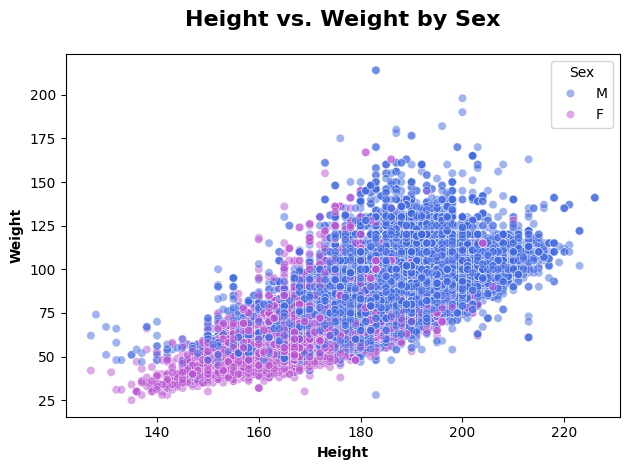

In [ ]:
# Define custom color palette
gender_palette = {'M': 'royalblue', 'F': 'mediumorchid'}

# Filter complete cases
filtered_df = distinct_athletes[distinct_athletes[['Height', 'Weight', 'Sex']].notna().all(axis=1)]

# Plot
sns.scatterplot(
    data=filtered_df,
    x='Height',
    y='Weight',
    hue='Sex',
    palette=gender_palette,
    alpha=0.5
)

# Title and layout
plt.title('Height vs. Weight by Sex', fontsize=16, pad=20, fontweight = 'bold')
plt.xlabel('Height', fontweight='bold')
plt.ylabel('Weight', fontweight='bold')
plt.tight_layout()
plt.show()


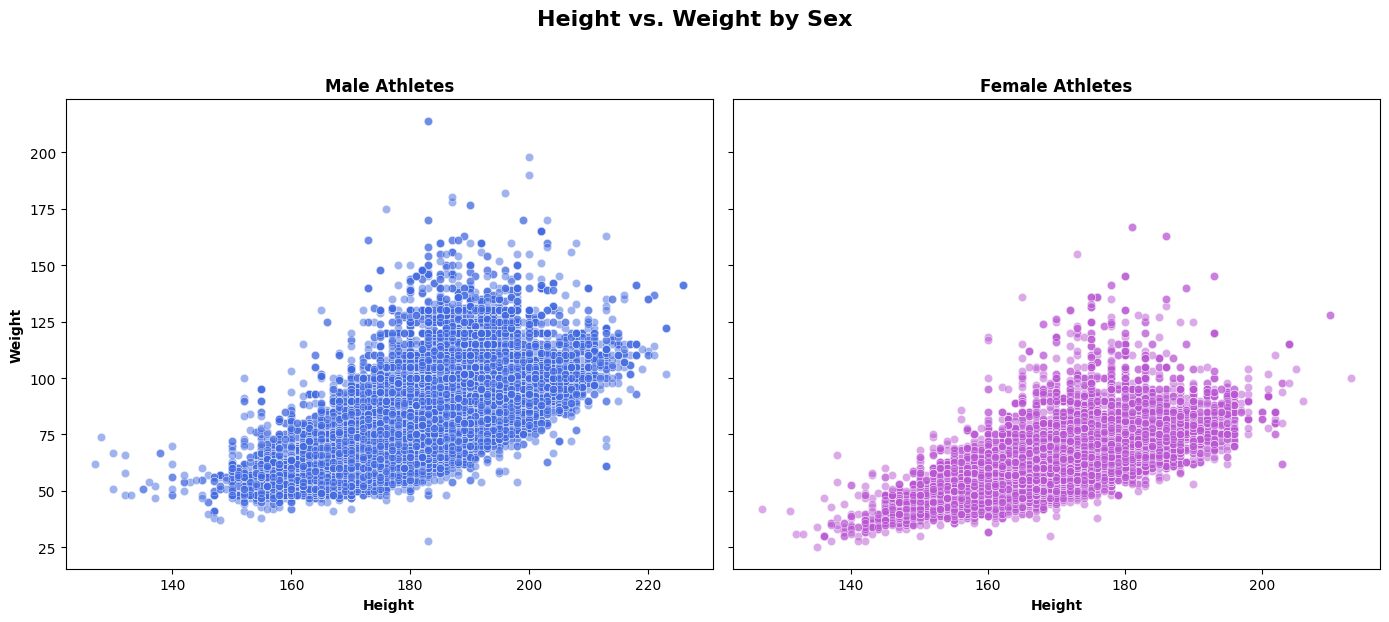

In [ ]:
# Custom color palette
gender_palette = {'M': 'royalblue', 'F': 'mediumorchid'}

# Filter complete data
filtered_df = distinct_athletes[distinct_athletes[['Height', 'Weight', 'Sex']].notna().all(axis=1)]

# Separate male and female data
male_df = filtered_df[filtered_df['Sex'] == 'M']
female_df = filtered_df[filtered_df['Sex'] == 'F']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Male subplot
sns.scatterplot(
    data=male_df,
    x='Height',
    y='Weight',
    color=gender_palette['M'],
    alpha=0.5,
    ax=axes[0]
)
axes[0].set_title('Male Athletes', fontweight='bold')
axes[0].set_xlabel('Height', fontweight='bold')
axes[0].set_ylabel('Weight', fontweight='bold')

# Female subplot
sns.scatterplot(
    data=female_df,
    x='Height',
    y='Weight',
    color=gender_palette['F'],
    alpha=0.5,
    ax=axes[1]
)
axes[1].set_title('Female Athletes', fontweight='bold')
axes[1].set_xlabel('Height', fontweight='bold')
axes[1].set_ylabel('')

# Main title and layout
fig.suptitle('Height vs. Weight by Sex', fontsize=16, y=1.03, fontweight = 'bold')
plt.tight_layout()
plt.show()


## **1. What key factors influence an athlete's performance?**

- **Weight vs. Height (r = 0.80)** - This strong positive correlation indicates that, at the individual athlete level, taller athletes tend to weigh more. This is expected due to natural body proportions and physiological scaling. It also validates the relationship between body size and physical build common in many sports disciplines.
- **Other Attributes** - The remaining variables (such as age, year, and medal received) did not exhibit strong or meaningful correlations with one another. This suggests that Olympic performance and athlete characteristics like age or medal acquisition may likely be influenced by more complex, sport-specific, or external factors rather than simple linear relationships.

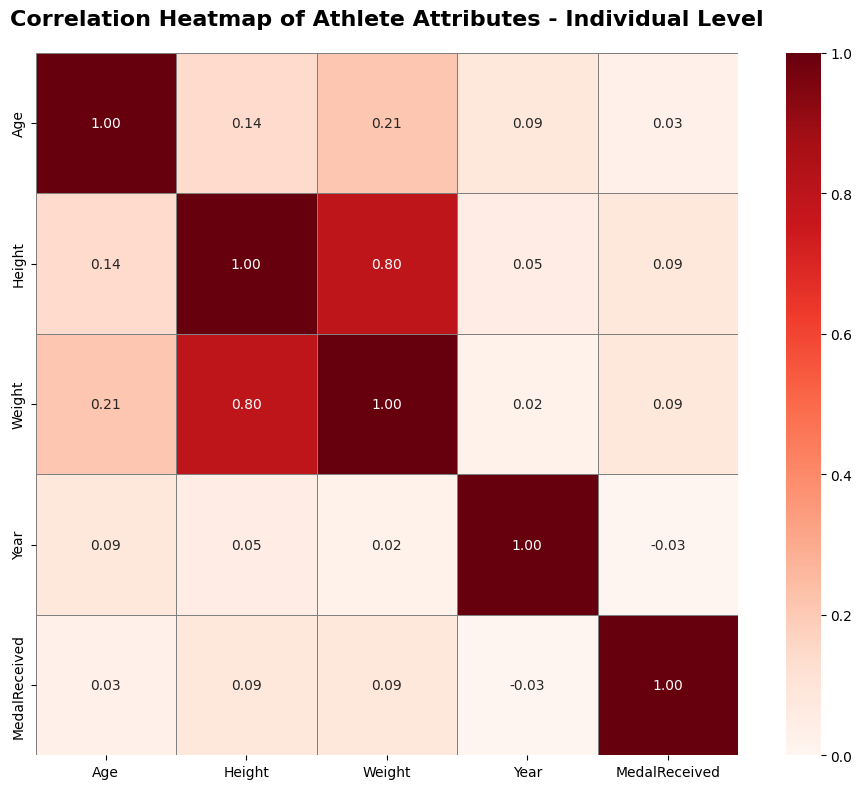

In [ ]:
# Create binary Medal flag
df['MedalReceived'] = df['Medal'].notna().astype(int)

# Select numeric columns including target
numeric_cols = ['Age', 'Height', 'Weight', 'Year', 'MedalReceived']
corr_df = df[numeric_cols].dropna()  # drop rows with missing numeric values

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Reds',          # Monochromatic red gradient
    vmin=0,               # Set minimum for color scaling
    vmax=1,               # Max = perfect positive correlation
    fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    square=True
)

plt.title('Correlation Heatmap of Athlete Attributes - Individual Level', fontsize=16, pad=20, fontweight = 'bold')
plt.tight_layout()
plt.show()


####**Country Level Correlations** - Exploring Attributes like Height, Weight, Age,Years of Participation, Total Medals Received
- **Years of Participation vs. Total Medals (r = 0.49)** - This moderate positive correlation suggests that countries with longer histories of Olympic participation tend to win more medals. However, the relationship is not extremely strong—implying that while consistent participation helps, medal success also depends on other factors (e.g. possibly athlete quality, investment in sports, and event specialization).
- **Years of Participation vs. Athlete Count (r = 0.67)** - Countries that have participated in more Olympic years also tend to have larger overall athlete counts. This makes sense historically, as long-standing Olympic nations have developed deeper infrastructures and broader athlete pipelines over time.
- **Athlete Count vs. Total Medals (r = 0.92)** - This very strong positive correlation indicates that countries sending more athletes to the Olympics almost always win more medals. It highlights the impact of larger delegation sizes, where greater representation increases the chances of medal success across multiple events.
- **Weight vs. Height (r = 0.73)** - A strong correlation exists between the height and weight of athletes per country. This reflects a general physiological trend—taller athletes tend to weigh more—and is consistent across national averages, regardless of sport.


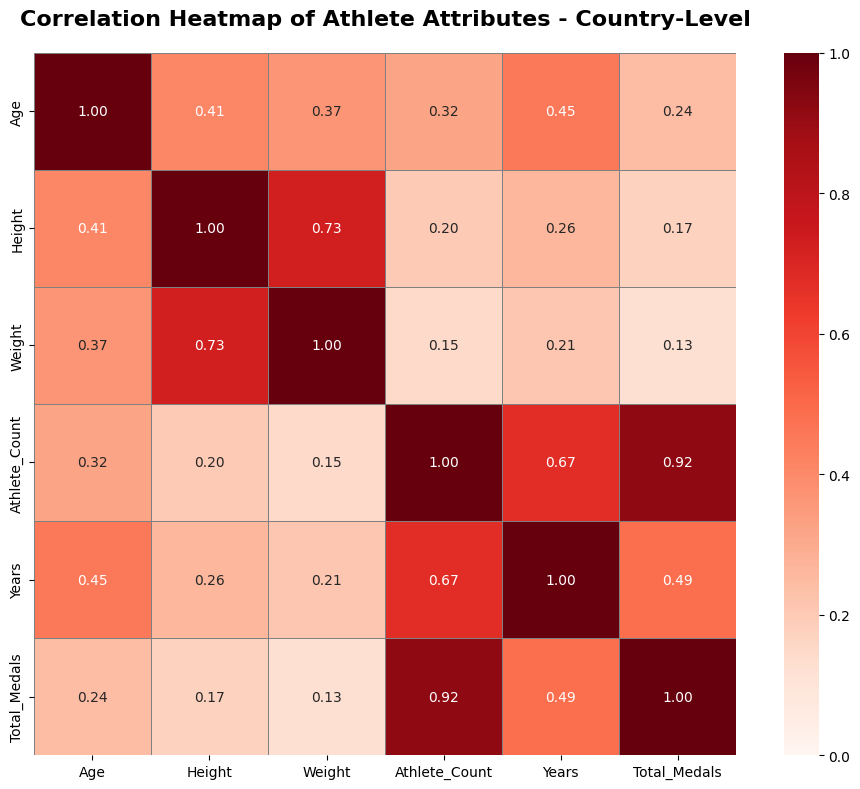

In [ ]:
# Create MedalCount column
df['MedalCount'] = df['Medal'].notna().astype(int)

# Group by NOC (country)
country_summary = df.groupby('NOC').agg({
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'ID': 'nunique',            # number of unique athletes
    'Year': 'nunique',          # number of Olympic years participated
    'MedalCount': 'sum'         # total medals won
}).rename(columns={
    'ID': 'Athlete_Count',
    'Year':  'Years',
    'MedalCount': 'Total_Medals'
}).dropna()

# Compute correlation matrix
corr_matrix = country_summary.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Reds',          # Monochromatic red gradient
    vmin=0,               # Set minimum for color scaling
    vmax=1,               # Max = perfect positive correlation
    fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    square=True
)

plt.title('Correlation Heatmap of Athlete Attributes - Country-Level', fontsize=16, pad=20, fontweight = 'bold')
plt.tight_layout()
plt.show()


## **Competition Trends**

### **Highest Medal Count (Top 15)**

In [ ]:
# Filter rows with medals
medalists = df[df['Medal'].notna()]

# Group by athlete ID, Name, and Team (country) and count medals
medal_counts = medalists.groupby(['ID', 'Name', 'Team', 'Sex']).size().reset_index(name='Medal_Count')

# Sort by medal count (descending)
top_medalists = medal_counts.sort_values(by='Medal_Count', ascending=False)

# Display top N (e.g., top 15)
print(top_medalists.head(15))


           ID                                             Name           Team  \
19833   94406                          Michael Fred Phelps, II  United States   
14106   67046               Larysa Semenivna Latynina (Diriy-)   Soviet Union   
666      4198                     Nikolay Yefimovich Andrianov   Soviet Union   
18790   89187                                      Takashi Ono          Japan   
2231    11951                              Ole Einar Bjrndalen         Norway   
22947  109161                      Borys Anfiyanovych Shakhlin   Soviet Union   
15725   74420                              Edoardo Mangiarotti          Italy   
17973   85286                          Aleksey Yuryevich Nemov         Russia   
4572    23426                    Natalie Anne Coughlin (-Hall)  United States   
25682  121258             Dara Grace Torres (-Hoffman, -Minas)  United States   
14966   70965                               Ryan Steven Lochte  United States   
12029   57998               

In [ ]:
# Filter only medal-winning rows
medalists = df[df['Medal'].notna()]

# Group by Sport + athlete info and count medals
medal_counts = (
    medalists
    .groupby(['Sport', 'ID', 'Name', 'Team', 'Sex'])
    .size()
    .reset_index(name='Medal_Count')
)

# For each sport, get the athlete with the most medals
top_per_sport = (
    medal_counts
    .sort_values(['Sport', 'Medal_Count'], ascending=[True, False])
    .groupby('Sport')
    .head(1)  # top 1 per sport
    .reset_index(drop=True)
)

top_per_sport = top_per_sport.sort_values(by='Medal_Count', ascending=False)

# Display result
print(top_per_sport)



                  Sport     ID                                Name  \
54             Swimming  94406             Michael Fred Phelps, II   
27           Gymnastics  67046  Larysa Semenivna Latynina (Diriy-)   
22              Fencing  74420                 Edoardo Mangiarotti   
11             Biathlon  11951                 Ole Einar Bjrndalen   
5             Athletics  87390                Paavo Johannes Nurmi   
..                  ...    ...                                 ...   
15              Cricket   3871            William Wallace Anderson   
42                Roque  15484                       Charles Brown   
45         Rugby Sevens   1095              Cecil Sebastian Afrika   
35  Military Ski Patrol   5932                Alfred Aufdenblatten   
40             Racquets   5716                    John Jacob Astor   

                                              Team Sex  Medal_Count  
54                                   United States   M           28  
27                 

**Comments and Observations**
- Gold medalists were found to range widely in age—from teenagers to individuals over 60 years old. However, the majority of gold medal winners fall approximately within the 17 to 34 age bracket, highlighting a peak performance window during young adulthood and early middle age.

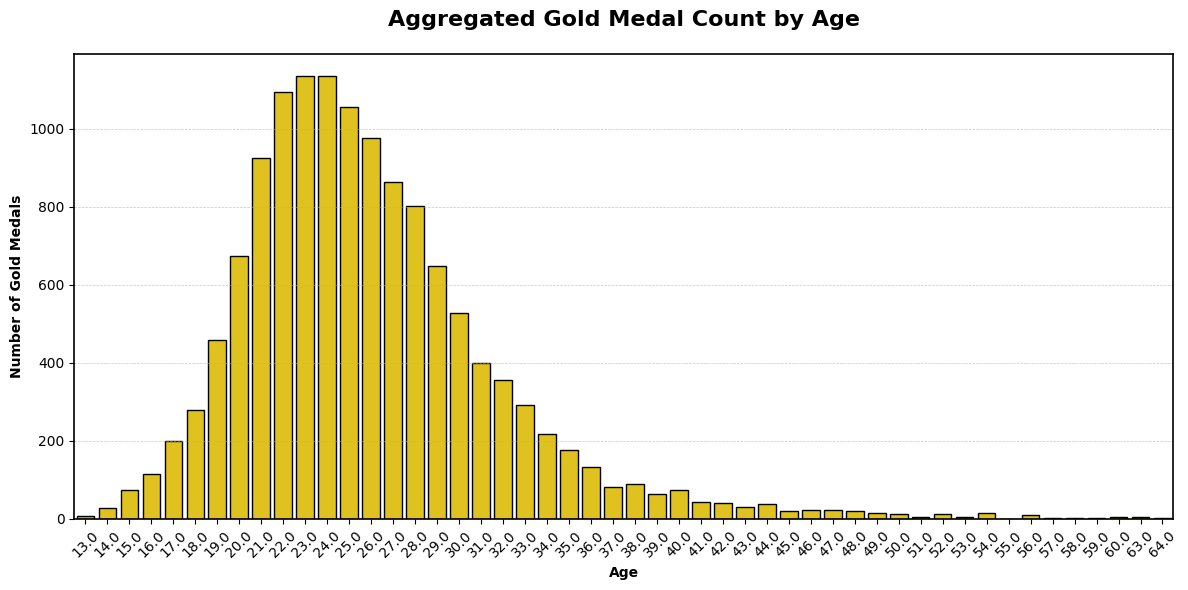

In [ ]:
# Filter for gold medalists with valid age
gold_medalists = df[(df['Medal'] == 'Gold') & df['Age'].notna()]

# Group by Age and count gold medals
gold_by_age = (
    gold_medalists
    .groupby('Age')
    .size()
    .reset_index(name='Gold_Medal_Count')
    .sort_values(by='Age')
)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=gold_by_age, x='Age', y='Gold_Medal_Count', color='#FFD700', edgecolor='black')

# Title and labels
plt.title('Aggregated Gold Medal Count by Age', fontsize=16, pad=20 , fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Number of Gold Medals', fontweight='bold')
plt.xticks(rotation=45)

# Add horizontal gridlines
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add black border around the chart
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()


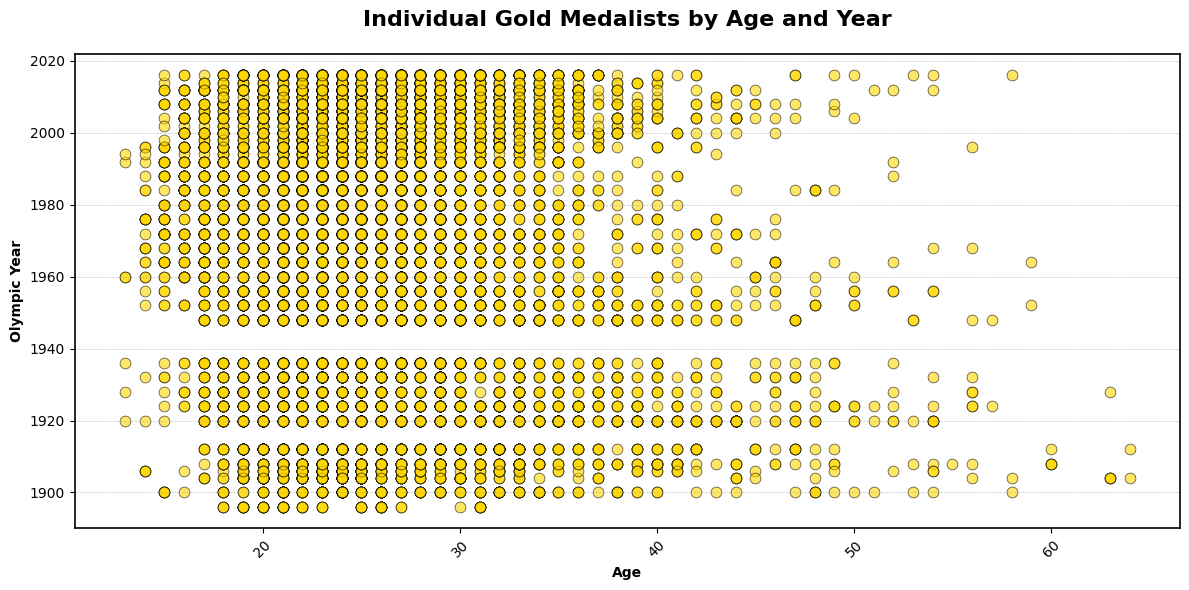

In [ ]:
# Filter for gold medalists with valid age
gold_medalists = df[(df['Medal'] == 'Gold') & df['Age'].notna()]

# Plot each gold medalist as a dot
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(
    data=gold_medalists,
    x='Age',
    y='Year',  # You can use 'Year' or set all y-values to 1 to stack them horizontally
    color='#FFD700',
    s=60,
    edgecolor='black',
    alpha=0.6
)

# Title and labels
plt.title('Individual Gold Medalists by Age and Year', fontsize=16, pad=20 , fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Olympic Year', fontweight='bold')
plt.xticks(rotation=45)

# Horizontal gridlines
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Black border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()


### **Filter for gold medalists above age 50**

**Comments and Observations**
- Out of curiosity, we explored which sports featured gold medalists aged 50 and above.
- Interestingly, we found several examples in disciplines such as Roque, Shooting, Art Competitions, Archery, Sailing, and Equestrianism - sports that often emphasize skill, precision, and experience over raw physical strength.

In [ ]:
# Filter for gold medalists above age 50
gold_50plus = df[
    (df['Medal'] == 'Gold') &
    (df['Age'] > 50) &
    df['Name'].notna() &
    df['Sport'].notna()
][['Name', 'Age', 'Sport', 'Team', 'Year', 'Event']].drop_duplicates()

# Sort for readability
gold_50plus = gold_50plus.sort_values(by='Age', ascending=False)

# Display result
print(gold_50plus)


                                           Name   Age             Sport  \
105199                          Charles Jacobus  64.0             Roque   
233390                        Oscar Gomer Swahn  64.0          Shooting   
261102                  Robert W. Williams, Jr.  63.0           Archery   
190952  Lida Peyton "Eliza" Pollock (McMillen-)  63.0           Archery   
104003                     Isaac Lazarus Israls  63.0  Art Competitions   
...                                         ...   ...               ...   
24897             Gustaf Adolf Boltenstern, Jr.  52.0     Equestrianism   
168551                            Harald Natvig  51.0          Shooting   
107171                  Harry Wyndham Jefferson  51.0           Sailing   
239379                            Peter Thomsen  51.0     Equestrianism   
248116          Hendrikus "Driekske" van Bussel  51.0           Archery   

                      Team  Year  \
105199       United States  1904   
233390              Sweden 

#### **Top 10 Countries by Medal Count**
**Comments and Observations**
- The United States emerged as the leading nation in terms of total Olympic medals won.
- Interestingly, the Soviet Union ranks second overall—an impressive feat considering it has not competed as a unified entity for several decades, highlighting their historical dominance during its years of participation.

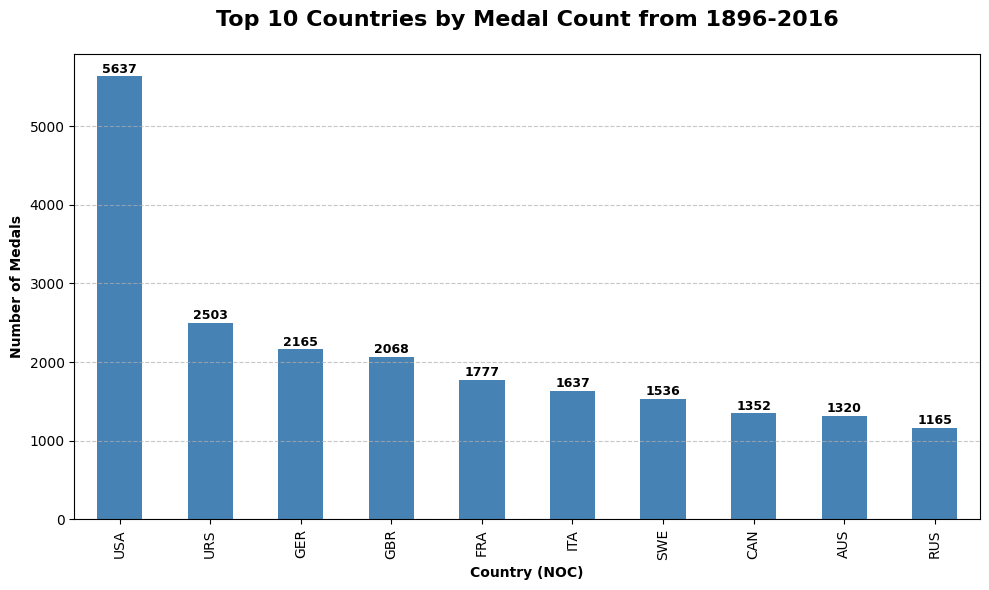

In [ ]:
# Get top 10 countries by medal count
top_medals = df[df['Medal'].notna()]['NOC'].value_counts().head(10)

# Plot
ax = top_medals.plot(kind='bar', color='steelblue', figsize=(10, 6))  # width=10, height=6 inches

# Titles and labels
plt.title('Top 10 Countries by Medal Count from 1896-2016', fontsize=16, pad = 20, fontweight='bold')
plt.xlabel('Country (NOC)', fontweight='bold')
plt.ylabel('Number of Medals', fontweight='bold')

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for i, value in enumerate(top_medals.values):
    ax.text(i, value + 5, f'{value}', ha='center', va='bottom', fontsize=9, fontweight = 'bold')

plt.tight_layout()
plt.show()


#### **Top 10 Countries by Medal Count in Summer and Winter Games**
**Comments and Observations**
- When examining medal counts at a more granular level—specifically comparing Summer and Winter Olympic Games—the United States continues to dominate in both arenas.
- However, the margin of dominance narrows significantly in the Winter Games, where countries like Canada and Norway emerge as strong contenders.
- Interestingly, while Norway and Canada are top performers in the Winter Olympics, they do not appear in the top 10 for Summer Games.
- Notable countries that consistently rank in the top 10 for both Summer and Winter Games include the Soviet Union, Russia, Germany, and Sweden, reflecting their broad athletic strength across seasons.

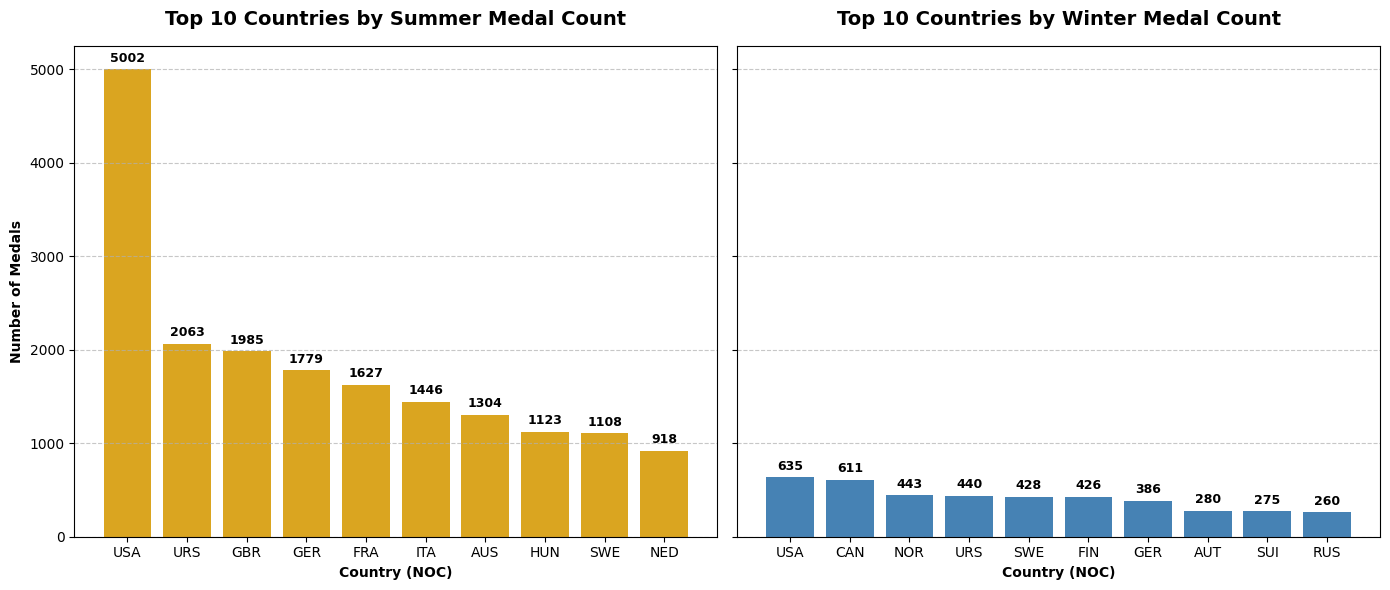

In [ ]:
# Filter medals only
medals_df = df[df['Medal'].notna()]

# Get top 10 NOCs for Summer and Winter separately
top_summer = medals_df[medals_df['Season'] == 'Summer']['NOC'].value_counts().head(10)
top_winter = medals_df[medals_df['Season'] == 'Winter']['NOC'].value_counts().head(10)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Summer ---
axes[0].bar(top_summer.index, top_summer.values, color='goldenrod')
axes[0].set_title('Top 10 Countries by Summer Medal Count', fontsize=14, pad=15, fontweight = 'bold')
axes[0].set_xlabel('Country (NOC)', fontweight = 'bold')
axes[0].set_ylabel('Number of Medals', fontweight = 'bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(top_summer.values):
    axes[0].text(i, val + 80, str(val), ha='center', fontsize=9, fontweight = 'bold')

# --- Winter ---
axes[1].bar(top_winter.index, top_winter.values, color='steelblue')
axes[1].set_title('Top 10 Countries by Winter Medal Count', fontsize=14, pad=15, fontweight = 'bold')
axes[1].set_xlabel('Country (NOC)', fontweight = 'bold')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for i, val in enumerate(top_winter.values):
    axes[1].text(i, val + 80, str(val), ha='center', fontsize=9, fontweight = 'bold')

# Final layout
plt.tight_layout()
plt.show()

In [ ]:
# Get count of medals by Season and Medal type
medal_counts = df[df['Medal'].notna()].groupby(['Season', 'Medal']).size().unstack(fill_value=0)

# Print the summary table
print("Medal Counts by Season and Type:")
print(medal_counts)

Medal Counts by Season and Type:
Medal   Bronze   Gold  Silver
Season                       
Summer   11409  11459   11220
Winter    1886   1913    1896


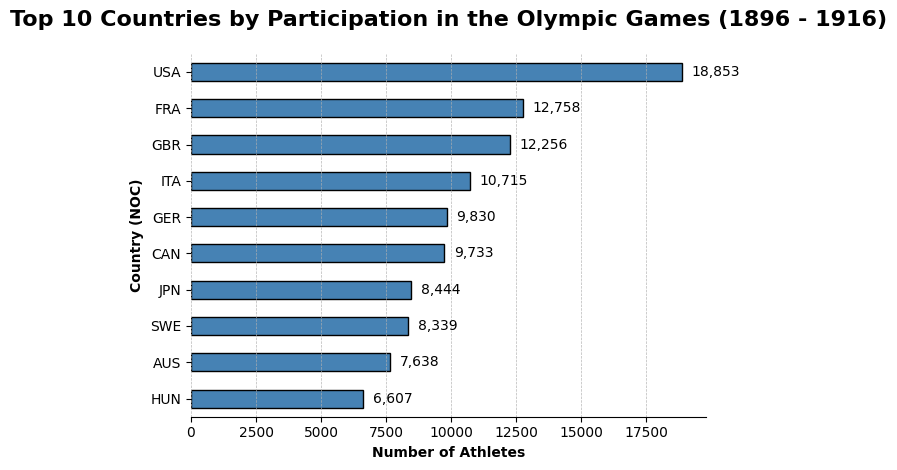

In [ ]:
# Get top 10 countries by participation
top_10 = df['NOC'].value_counts().head(10).sort_values(ascending=True)  # sort for horizontal bar

# Create horizontal bar chart
ax = top_10.plot(kind='barh', color='steelblue', edgecolor='black')

# Title and labels
plt.title('Top 10 Countries by Participation in the Olympic Games (1896 - 1916)', fontsize=16, pad=20, fontweight = 'bold')
plt.xlabel('Number of Athletes', fontweight = 'bold')
plt.ylabel('Country (NOC)', fontweight = 'bold')

offset = top_10.max() * 0.02  # 2% of the max value


# Add value labels to bars
for i, value in enumerate(top_10.values):
    ax.text(value + offset, i, f'{value:,}', va='center', fontsize=10, color='black')

# Add horizontal gridlines
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.9)

# Remove border spines for a cleaner look
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
# Merge the region info onto the Olympic data
df = pd.merge(df, df_noc[['NOC', 'region']], on='NOC', how='left')

In [ ]:
#Count participation by region
top_countries = df['region'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Count']


In [ ]:
print(top_countries['Country'].tolist())

['USA', 'Germany', 'France', 'UK', 'Russia', 'Italy', 'Canada', 'Japan', 'Sweden', 'Australia']


### **Top 10 Countries by Participation**
- A more visually engaging representation—a geographical choropleth map—was created to highlight the top 10 countries by Olympic participation.
- This interactive map allows users to hover, zoom, and rotate, enhancing usability and exploration.
- Varying color intensities were used to reflect the scale of participation, with darker shades indicating countries with higher athlete representation across the Olympic Games.

In [ ]:
# Plot choropleth map for the top 10 countries
fig = px.choropleth(
    top_countries,
    locations='Country',
    locationmode='country names',
    color='Count',
    color_continuous_scale='Greens',
    #title='<b>Top 10 Countries by Olympic Participation</b>'
)

# Style the map
fig.update_layout(
    height=600,
    width=1000,
    title_font_size=18,
    geo=dict(
        showframe=False,
        projection_type='natural earth',
        showcountries=True,
        countrycolor='gray'
    ),
    title={
        'text': '<b>Top 10 Countries by Participation in the Olympic Games (1896 - 1916)</b><br> (Interactive Hover, Zoom and Rotate)',
        'x': 0.5,              # Centers title horizontally
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 20,
            'family': 'Arial',
            'color': 'black'
        }
    }
)
fig.add_annotation(
    text="<b>Note:</b><br>French Guiana appears<br> as part of France.",
    xref="paper", yref="paper",
    x=0, y=0.2,
    showarrow=False,
    font=dict(size=12, color="white"),
    align="left",
    bgcolor="#333333",
    bordercolor="white",
    borderwidth=1,
    borderpad=4
)

fig.show()

### **Top 10 Sports by Participation in the Olympic Games**
**Comments and Observations**
- We also explored which sports had the highest athlete participation across Olympic history.
- The analysis revealed that Athletics, Gymnastics, and Swimming emerged as the top three sports, reflecting their broad global appeal and long-standing presence in the Olympic Games.

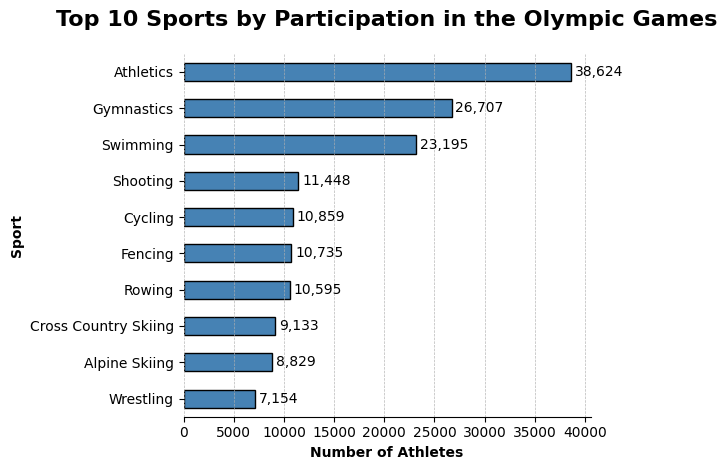

In [ ]:
# Get top 10 sports by participation and sort for horizontal display
top_sports = df['Sport'].value_counts().head(10).sort_values(ascending=True)

# Plot horizontal bar chart
ax = top_sports.plot(kind='barh', color='steelblue', edgecolor='black')

# Title and axis labels
plt.title('Top 10 Sports by Participation in the Olympic Games', fontsize=16, pad=20, fontweight = 'bold')
plt.xlabel('Number of Athletes', fontweight = 'bold')
plt.ylabel('Sport', fontweight = 'bold')
offset = top_10.max() * 0.02  # 2% of the max value

# Add value labels to bars with spacing
for i, value in enumerate(top_sports.values):
    ax.text(value + offset, i, f'{value:,}', va='center', fontsize=10, color='black')

# Add horizontal gridlines
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.9)

# Remove chart borders for a cleaner look
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Tidy up layout
plt.tight_layout()
plt.show()


In [ ]:
# Get top 10 sports by participation
top_sports = df['Sport'].value_counts().head(10).reset_index()
top_sports.columns = ['Sport', 'Count']

# Create interactive pie chart
fig = px.pie(
    top_sports,
    names='Sport',
    values='Count',
    title='Top 10 Sports by Participation',
    hole=0,
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Customize hover + remove labels from sectors
fig.update_traces(
    textinfo='percent',
    textfont=dict(
        size=14,        # Increase font size
        color='black',  # Text color (use white if your slices are dark)
        family='Arial', # Optional: change font family
    ),
    hovertemplate='<b>%{label}</b><br>Count: %{value:,}<br>Percentage: %{percent}<extra></extra>',
    marker=dict(line=dict(color='black', width=1))
)

# Layout with custom hover style
fig.update_layout(
    title=dict(
        text='<b>Top 10 Sports by Participation in the Olympic Games</b>',
        font=dict(size=20),
        x=0.5
    ),
    legend=dict(
        title='Sport',
        x=0.8,           # Distance from left
        xanchor='left',  # Anchor legend box to its left side
        y=0.5,         # Center vertically
        yanchor='middle',
        bgcolor='rgba(255,255,255,0)',  # Transparent background
    ),
    showlegend=True,
    height=600,
    hoverlabel=dict(
        bgcolor="black",
        font_color="white"
    )
)

fig.show()


### **Top 10 Olympic Events by Participation (Male domination)**
- Drilling further into the data, we examined the top Olympic events by athlete participation.
- As expected, men’s events dominated the top 10, largely due to their earlier and more frequent inclusion in the Olympic program.
- Notable examples among the most participated events include Men’s Football, Men’s Hockey, and Water Polo, reflecting both the popularity and team-based nature of these sports.

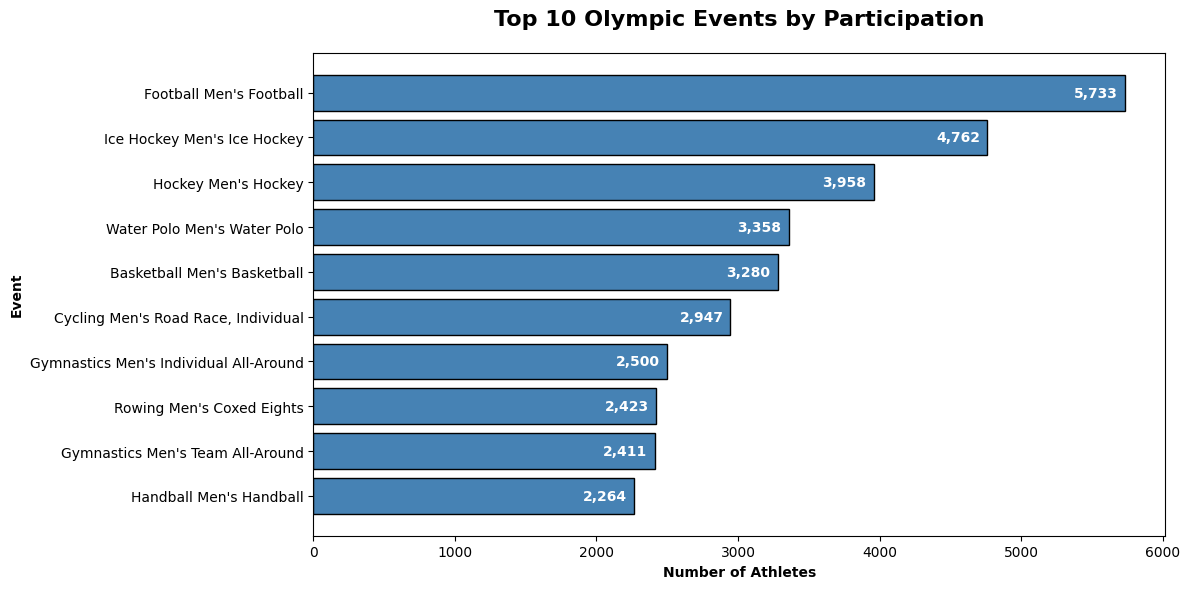

In [ ]:
# Get top 10 events by participation
top_events = df['Event'].value_counts().head(10).sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(top_events.index, top_events.values, color='steelblue', edgecolor='black')

# Add value labels
for i, v in enumerate(top_events.values):
    plt.text(v - 50, i, f'{v:,}', va='center', ha='right', color='white', fontsize=10, fontweight='bold')


# Titles and labels
plt.title('Top 10 Olympic Events by Participation', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Athletes', fontweight='bold')
plt.ylabel('Event', fontweight='bold')

# Layout
plt.tight_layout()
plt.show()


### **Top 10 Olympic Events by Female Participation**
**Comments and Observations**
- Nonetheless, we were curious to explore female participation across Olympic events.
- Our analysis revealed that Volleyball, Gymnastics, Hockey, Handball and Basketball were among the top events with the highest female representation.
- These findings highlight the growing prominence and popularity of women’s sports in the Olympic arena over time.

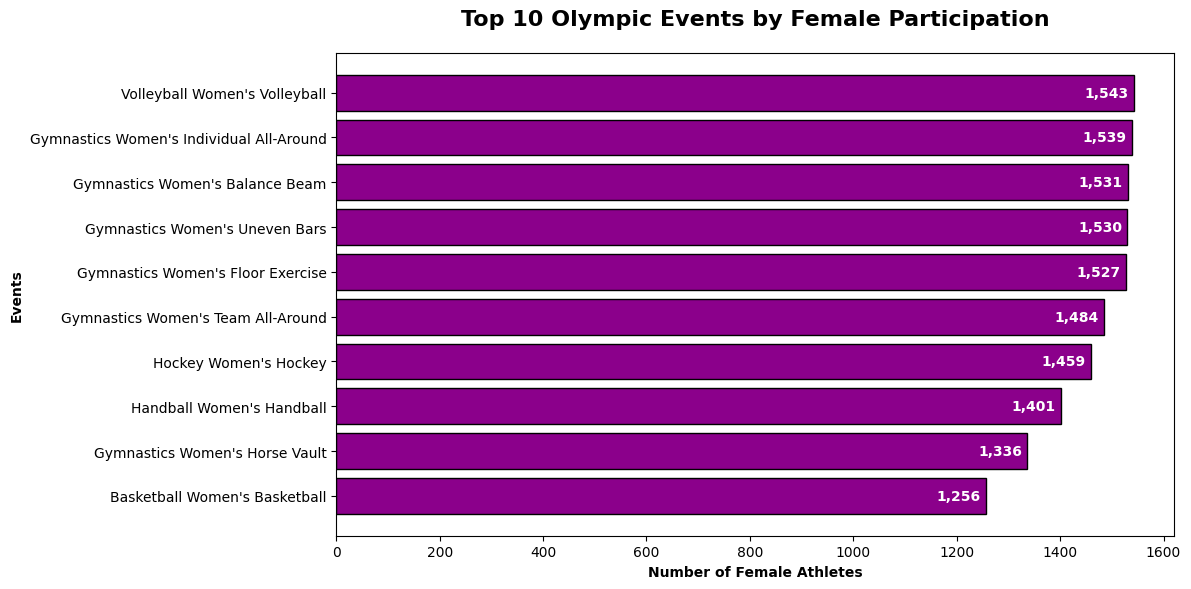

In [ ]:
# Filter for female athletes only
female_df = df[df['Sex'] == 'F']

# Get top 10 sports by participation (count)
top_female_events = female_df['Event'].value_counts().head(10).sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(top_female_events.index, top_female_events.values, color='#8B008B', edgecolor='black')

# Add value labels inside the bars
for i, v in enumerate(top_female_events.values):
    plt.text(v - 10, i, f'{v:,}', va='center', ha='right', color='white', fontsize=10, fontweight='bold')

# Titles and axis labels
plt.title('Top 10 Olympic Events by Female Participation', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Female Athletes', fontweight='bold')
plt.ylabel('Events', fontweight='bold')

plt.tight_layout()
plt.show()


### **Correlation Heatmaps: A Closer Examination of Events and their Relationship to Attributes in the Olympic Dataset**

#### **Examining Women's Volleyball (Top Event at the Olympics) - Individual Level**
**Comments and Observations**
- Weight and Height (0.67) - As expected, there is a moderately strong positive correlation between an athlete’s weight and height. This aligns with general physiological trends — taller individuals tend to weigh more due to greater body mass.

- Height and Year Participated (0.48) - This moderate positive correlation suggests that average athlete height has gradually increased over the years, possibly reflecting changes in selection criteria, training, and nutrition.

- Age and Year (0.30) - A mild positive correlation indicates that the average age of Olympic athletes has slightly increased over time. This could be due to longer athletic careers, better conditioning, or greater inclusivity of experienced athletes in some sports.

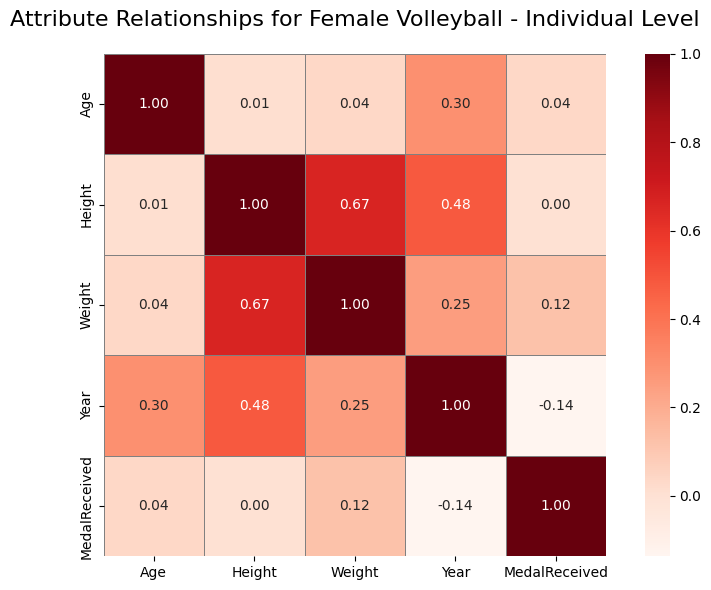

In [ ]:
# Create binary indicator for medal received
df['MedalReceived'] = df['Medal'].notna().astype(int)

# Filter for female volleyball athletes
volleyball_female = df[(df['Sport'] == 'Volleyball') & (df['Sex'] == 'F')]

# Select relevant columns and drop missing values
subset_volleyball = volleyball_female[['Age', 'Height', 'Weight', 'Year', 'MedalReceived']].dropna()

# Compute correlation matrix
corr_matrix_volleyball = subset_volleyball.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix_volleyball,
    annot=True,
    cmap='Reds',
    fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    square=True
)

plt.title('Attribute Relationships for Female Volleyball - Individual Level', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


#### **Examining Women's All Events vs. Volleyball (Top Event at the Olympics) - Country Level**
**Comments and Observations**
**All Female Events (Country-Level Correlations)**
- Height to Age (r = 0.34) - This indicates a moderate positive relationship — countries with taller female athletes tend to have slightly older average participants, possibly reflecting experience-based selections in certain sports.

- Athlete Count to Years Participated (r = 0.49) - This reflects that countries that have participated in more Olympic years tend to have more unique female athletes, though it's not a perfect relationship.

- Total Medals to Athlete Count (r = 0.90) - A very strong positive correlation, indicating that countries with more female athletes tend to win more medals — suggesting depth of talent is a key contributor to national success.

- Height to Weight (r = 0.56) - A moderate-to-strong positive correlation, as expected — taller athletes generally weigh more, showing consistency across diverse sports.

**Female Volleyball Only (Country-Level Correlations)**
- Athlete Count to Years Participated (r = 0.98) - An extremely strong correlation — nearly linear — meaning that most countries field the same size volleyball teams across each Olympic year they participate.

- Total Medals to Athlete Count (r = 0.80) - A strong positive correlation — more athletes in volleyball are associated with higher medal counts, reinforcing that sustained investment in female volleyball teams pays off competitively.

- Athlete Count to Total Medals (r = 0.79) - This is consistent with the above, showing team size and medal performance are closely linked in volleyball — more participation correlates with higher success.

- Height to Weight (r = 0.56) - Similar to the overall trend — taller volleyball players also tend to weigh more, reflecting the typical physical profile of the sport.

**Key Takeaways**
- Athlete volume is a key driver of medal success, especially at the national level.
- Female volleyball shows high structural consistency — countries participating more years almost always field larger, medal-winning teams.


<ipython-input-64-8b60ec5bb41f>:88: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



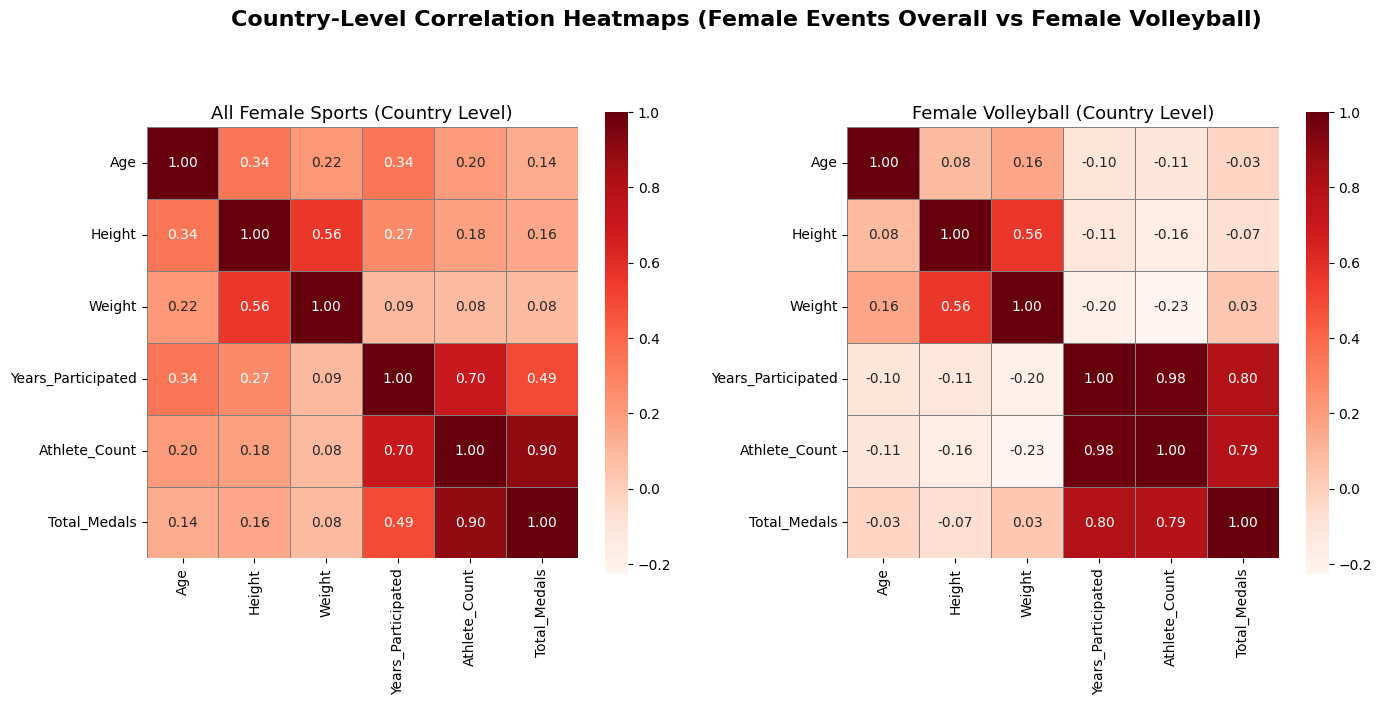

In [ ]:
# Create indicator for whether athlete received a medal
df['MedalReceived'] = df['Medal'].notna().astype(int)

# Country-Level: Female Athletes (All Sports)
female_df = df[df['Sex'] == 'F']

country_summary_female_all = female_df.groupby('NOC').agg({
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'Year': 'nunique',            # Number of Olympic years participated
    'ID': 'nunique',              # Unique athlete count
    'MedalReceived': 'sum'        # Total medals won
}).rename(columns={
    'Year': 'Years_Participated',
    'ID': 'Athlete_Count',
    'MedalReceived': 'Total_Medals'
}).dropna()

# Country-Level: Female Volleyball Athletes Only
vb_female = df[(df['Sport'] == 'Volleyball') & (df['Sex'] == 'F')]

country_summary_vb = vb_female.groupby('NOC').agg({
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'Year': 'nunique',
    'ID': 'nunique',
    'MedalReceived': 'sum'
}).rename(columns={
    'Year': 'Years_Participated',
    'ID': 'Athlete_Count',
    'MedalReceived': 'Total_Medals'
}).dropna()

# Compute Correlation Matrices
corr_female_all = country_summary_female_all.corr()
corr_female_vb = country_summary_vb.corr()

# Create subplots with colorbar space
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [1, 1], "wspace": 0.3})

# Set common color range
vmin = min(corr_female_all.min().min(), corr_female_vb.min().min())
vmax = max(corr_female_all.max().max(), corr_female_vb.max().max())

# Plot Heatmap 1 (All Sports - Female Athletes)
sns.heatmap(
    corr_female_all,
    ax=axes[0],
    annot=True,
    cmap='Reds',
    fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    square=True,
    vmin=vmin,
    vmax=vmax,
    cbar=True,
    cbar_ax=None
)
axes[0].set_title('All Female Sports (Country Level)', fontsize=13)
axes[0].tick_params(axis='y', labelrotation=0)

# Plot Heatmap 2 (Female Volleyball Athletes)
sns.heatmap(
    corr_female_vb,
    ax=axes[1],
    annot=True,
    cmap='Reds',
    fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    square=True,
    vmin=vmin,
    vmax=vmax,
    cbar=True
)
axes[1].set_title('Female Volleyball (Country Level)', fontsize=13)
axes[1].tick_params(axis='y', labelrotation=0)

# Add super title
plt.suptitle(
    'Country-Level Correlation Heatmaps (Female Events Overall vs Female Volleyball)',
    fontsize=16, fontweight='bold', y=1.05
)

plt.tight_layout()
plt.show()


#### **Examining Women's Basketball (Top Event at the Olympics) - Country Level**
**Comments and Observations**
- Athlete Count to Years Participated (r = 0.97) - This very strong positive correlation suggests that countries participating in more Olympic basketball tournaments tend to field more athletes overall. It reflects consistent and robust national programs.

- Total Medals to Years Participated (r = 0.72) - A moderately strong relationship, indicating that the more frequently a country participates in women’s basketball at the Olympics, the more medals it is likely to win. Experience appears to contribute to competitive success.

- Total Medals to Athlete Count (r = 0.66) - This suggests that larger national teams are moderately associated with greater medal success. However, it also implies that beyond team size, other factors (like skill, training quality, etc.) also may likely play a role.

- Weight to Height (r = 0.68) - A fairly strong correlation as expected—taller basketball players tend to weigh more, aligning with typical body composition and athlete profiles in the sport.







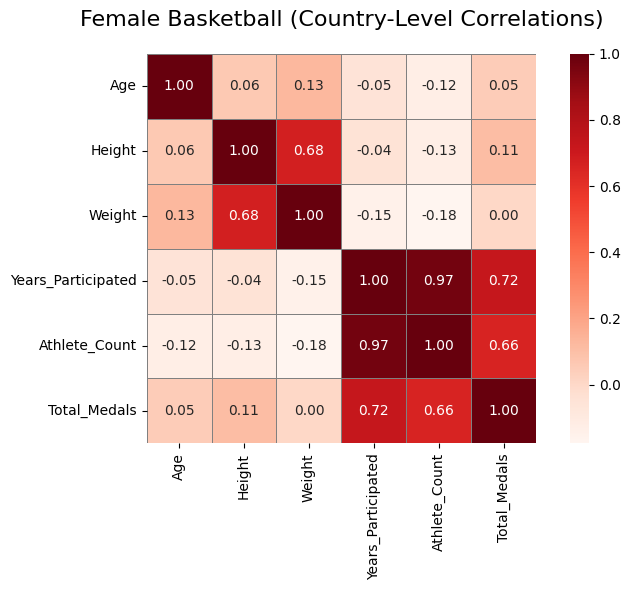

In [ ]:
# Create binary indicator for medal received
df['MedalReceived'] = df['Medal'].notna().astype(int)

# Filter for female basketball athletes
basketball_female = df[(df['Sport'] == 'Basketball') & (df['Sex'] == 'F')]

# Group by NOC (country) and compute relevant aggregates
country_summary_basketball = basketball_female.groupby('NOC').agg({
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'Year': 'nunique',           # Number of Olympic years participated
    'ID': 'nunique',             # Unique athletes
    'MedalReceived': 'sum'       # Total medals won
}).rename(columns={
    'Year': 'Years_Participated',
    'ID': 'Athlete_Count',
    'MedalReceived': 'Total_Medals'
}).dropna()

# Compute correlation matrix
corr_matrix_basketball = country_summary_basketball.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix_basketball,
    annot=True,
    cmap='Reds',
    fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    square=True
)

plt.title('Female Basketball (Country-Level Correlations)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


#### **Examining Women's Gymnastics (Top Event at the Olympics) - Country Level**
**Comments and Observations**
- Athlete Count to Years Participated (r = 0.89) - A strong positive relationship, showing that countries with a longer history in Olympic gymnastics also tend to contribute more gymnasts over time.

- Total Medals to Years Participated (r = 0.40) - A modest correlation, suggesting that simply participating more doesn't strongly guarantee medal success—indicating that performance in gymnastics may rely more on elite preparation than just years of presence.

- Total Medals to Athlete Count (r = 0.52) - A moderate correlation indicates that while more athletes might help improve medal chances, the relationship is not as strong as in basketball, possibly due to the highly selective nature of medal awards in gymnastics.

- Weight to Height (r = 0.61) - As expected, there is a moderate-to-strong correlation. Even in gymnastics, where athletes often have compact builds, taller gymnasts tend to weigh more.







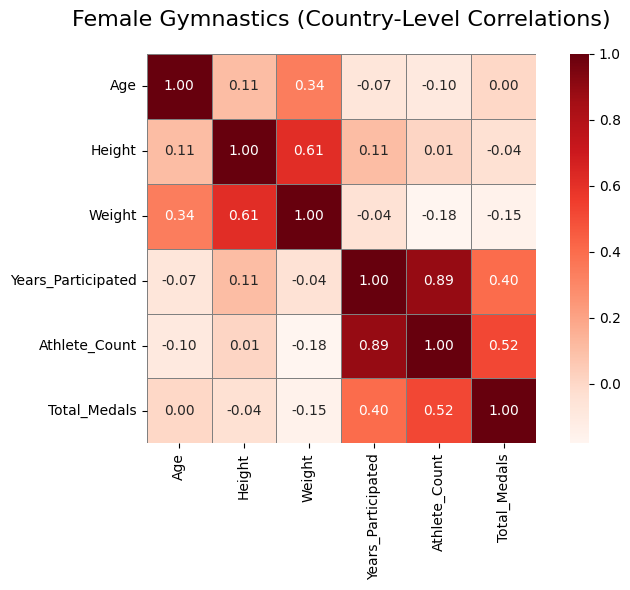

In [ ]:
# Create binary indicator for medal received
df['MedalReceived'] = df['Medal'].notna().astype(int)

# Filter for female gymnasts
gymnastics_female = df[(df['Sport'].str.contains('Gymnastics')) & (df['Sex'] == 'F')]

# Group by NOC (country) and compute relevant aggregates
country_summary_gymnastics = gymnastics_female.groupby('NOC').agg({
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'Year': 'nunique',           # Number of Olympic years participated
    'ID': 'nunique',             # Unique athletes
    'MedalReceived': 'sum'       # Total medals won
}).rename(columns={
    'Year': 'Years_Participated',
    'ID': 'Athlete_Count',
    'MedalReceived': 'Total_Medals'
}).dropna()

# Compute correlation matrix
corr_matrix_gymnastics = country_summary_gymnastics.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix_gymnastics,
    annot=True,
    cmap='Reds',
    fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    square=True
)

plt.title('Female Gymnastics (Country-Level Correlations)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()
